<b>8_Scanner_like_application</b>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
# from imutils import contours
from imutils.perspective import four_point_transform

In [2]:
im=cv2.imread("./scanner_doc.jpg")
img=im.copy()
blur=cv2.GaussianBlur(im,(5,5),0)
edge=cv2.Canny(blur,50,180)
cv2.imshow("original",im)
cv2.imshow("edge",edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
contours,_=cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
contours=sorted(contours,key=cv2.contourArea,reverse=True)
cv2.drawContours(im,contours,-1,(0,255,0),1)
# cv2.imshow("All contours",im)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

array([[[128, 137, 146],
        [ 73,  88, 104],
        [ 62,  90, 120],
        ...,
        [ 77, 112, 146],
        [ 72, 109, 143],
        [ 69, 106, 140]],

       [[125, 134, 143],
        [ 72,  87, 103],
        [ 63,  91, 121],
        ...,
        [ 78, 113, 147],
        [ 74, 111, 145],
        [ 71, 108, 142]],

       [[125, 134, 143],
        [ 73,  88, 104],
        [ 64,  92, 122],
        ...,
        [ 80, 115, 149],
        [ 75, 112, 146],
        [ 72, 109, 143]],

       ...,

       [[125, 134, 143],
        [ 70,  85, 101],
        [ 60,  88, 118],
        ...,
        [ 57,  89, 124],
        [ 54,  86, 121],
        [ 51,  83, 118]],

       [[126, 135, 144],
        [ 70,  85, 101],
        [ 59,  87, 117],
        ...,
        [ 56,  88, 123],
        [ 53,  85, 120],
        [ 51,  83, 118]],

       [[126, 135, 144],
        [ 70,  85, 101],
        [ 59,  87, 117],
        ...,
        [ 55,  87, 122],
        [ 53,  85, 120],
        [ 52,  84, 119]]

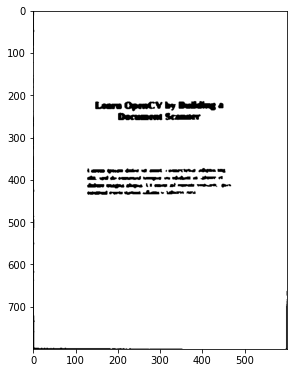

In [4]:
for contour in contours:
    border=0.05*cv2.arcLength(contour,True)
    approx_img=cv2.approxPolyDP(contour,border,True)
    if len(approx_img)==4:
        count=approx_img
        break
final_img=four_point_transform(img,count.reshape(4,2))
final_img=cv2.resize(final_img,(600,800))
# final_img=cv2.equalizeHist(final_img)
final_img=cv2.cvtColor(final_img,cv2.COLOR_BGR2GRAY)
_,final_img=cv2.threshold(final_img,160,255,cv2.THRESH_BINARY)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(final_img,cmap='gray')